In [2]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

## Load all data

In [3]:
meta = pd.read_csv("data/meta.csv")


In [4]:
valid_data = meta.loc[meta["edges"]>0,:]

In [71]:
def get_modularity_from_edgelist(edge_df:pd.DataFrame):
    G = nx.from_pandas_edgelist(edge_df,"from","to")
    comms = nx.community.louvain_communities(G,resolution=1,seed=420)
    mod = nx.community.modularity(G,comms)
    return len(comms),mod

In [72]:
modularity_values = []
commnums = []
for id in tqdm(valid_data["id"]):
    #print(id)
    temp_edgelist = pd.read_csv("data/{}/edges.csv".format(id))
    commnum, mod = get_modularity_from_edgelist(temp_edgelist)
    modularity_values.append(mod)
    commnums.append(commnum)



100%|██████████| 133/133 [00:11<00:00, 11.50it/s]


In [73]:
valid_data["modularity"] = modularity_values
valid_data["commnum"] = commnums

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\1744131051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["modularity"] = modularity_values
C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\1744131051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["commnum"] = commnums


In [74]:
valid_data

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat,commnum
0,walkingdead,5942.0,72746.0,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,0.652640,Bottom third,23
1,simpsons,5410.0,30943.0,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,0.612733,Top third,117
2,arrow,3681.0,28806.0,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,0.638665,Bottom third,26
3,greysanatomy,3457.0,13554.0,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,0.577096,Middle third,70
4,24,3180.0,73590.0,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,0.419688,Bottom third,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,californication,17.0,67.0,1,Californication,8.3,187628,Californication,tv,100,10,1,0.199638,Bottom third,3
129,startrekthenextgenerationremix,12.0,3.0,1,Star Trek: The Next Generation,8.7,134151,Star Trek The Next Generation Remix Wiki,tv,400,200,0,0.500000,Top third,2
130,smallville,8.0,13.0,1,Smallville,7.5,136832,Smallville Wiki,tv,3K,10K,100,0.030612,Bottom third,2
131,sinner,4.0,3.0,18,The Sinner,7.9,137424,The Sinner Wiki,tv,10,10,0,0.500000,Bottom third,2


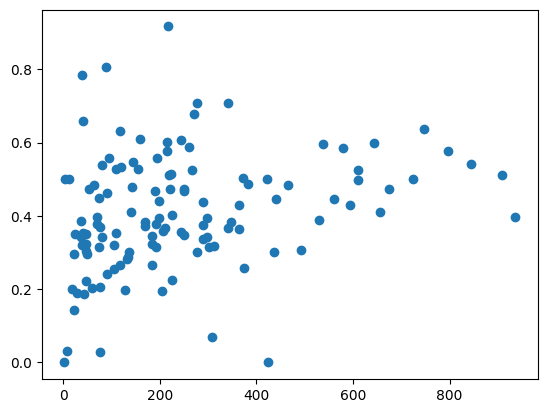

In [75]:
plt.scatter(valid_data.loc[valid_data["nodes"]<1000,"nodes"],
            valid_data.loc[valid_data["nodes"]<1000,"modularity"])

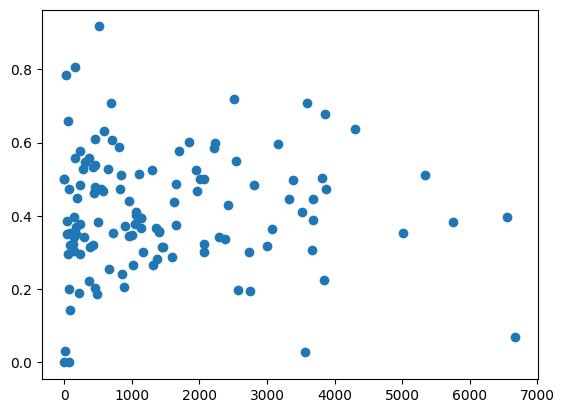

In [76]:
plt.scatter(valid_data.loc[valid_data["edges"]<8000,"edges"],
            valid_data.loc[valid_data["edges"]<8000,"modularity"])

In [77]:
valid_data.loc[valid_data["nodes"]>1000]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat,commnum
0,walkingdead,5942.0,72746.0,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,0.652640,Bottom third,23
1,simpsons,5410.0,30943.0,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,0.612733,Top third,117
2,arrow,3681.0,28806.0,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,0.638665,Bottom third,26
3,greysanatomy,3457.0,13554.0,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,0.577096,Middle third,70
4,24,3180.0,73590.0,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,0.419688,Bottom third,11
5,supernatural,2634.0,28951.0,50,Paranormal,8.0,74176,Supernatural Wiki,tv,5K,10K,400,0.397708,Bottom third,12
6,southpark,2455.0,154953.0,63,South Park,8.7,402704,South Park Archives,tv,6K,50K,500,0.594021,Top third,15
7,bones,1720.0,2509.0,35,Bones,7.8,174271,Bones Wiki,tv,2K,5K,700,0.719678,Bottom third,213
8,house,1513.0,5005.0,33,House,8.7,503036,House Wiki,tv,6K,1K,300,0.352144,Top third,23
9,familyguy,1321.0,2541.0,8,Family Guy,8.2,361387,Family Guy Wiki,tv,7K,9K,10,0.549802,Bottom third,40


(array([ 2.,  2., 11.,  6., 22., 31., 21., 28.,  7.,  3.]),
 array([6.8 , 7.07, 7.34, 7.61, 7.88, 8.15, 8.42, 8.69, 8.96, 9.23, 9.5 ]),
 <BarContainer object of 10 artists>)

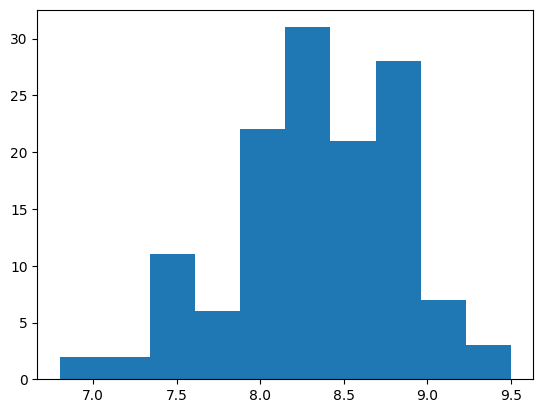

In [78]:
plt.hist(valid_data["imdb-score"])

In [79]:
valid_data["imdb-score"].quantile([0.33,0.66])

0.33    8.2
0.66    8.6
Name: imdb-score, dtype: float64

In [80]:
bins = [6.8, 8.4,8.6, 9.8 ]
labels = ['Bottom third','Middle third','Top third']
valid_data['score_cat'] = pd.cut(valid_data['imdb-score'], bins=bins, labels=labels)

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\1132264519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['score_cat'] = pd.cut(valid_data['imdb-score'], bins=bins, labels=labels)


C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3939152329.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (valid_data["nodes"]>50)].groupby('score_cat')


'\nplt.annotate("For All Mankind",\n             xy=(422,0.03),\n             xytext=(400,0.2),\n            arrowprops=dict(facecolor="black", shrink=0.05))\n'

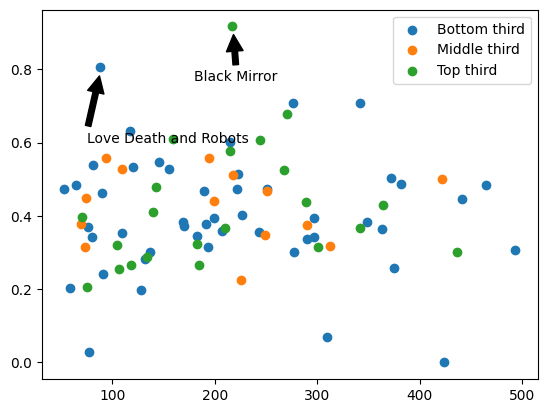

In [117]:
groups = valid_data.loc[(valid_data["nodes"]<500) & 
                        (valid_data["nodes"]>50)].groupby('score_cat')
for name, group in groups:
    plt.scatter(group.nodes, group.modularity, label=name)

plt.legend()
plt.annotate("Black Mirror",
             xy=(218,0.90),
             xytext=(180,0.77),
            arrowprops=dict(facecolor="black", shrink=0.05))
plt.annotate("Love Death and Robots",
             xy=(88,0.79),
             xytext=(75,0.60),
            arrowprops=dict(facecolor="black", shrink=0.05))
"""
plt.annotate("For All Mankind",
             xy=(422,0.03),
             xytext=(400,0.2),
            arrowprops=dict(facecolor="black", shrink=0.05))
"""


In [87]:
valid_data[valid_data["modularity"] > 0.75]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat,commnum
63,black-mirror,217.0,513.0,11,Black Mirror,8.7,631229,Black Mirror Wiki,tv,400,600,10,0.917006,Top third,25
99,lovedeathrobots,88.0,153.0,16,"Love, Death & Robots",8.4,193278,"Love, Death & Robots Wiki",tv,100,600,10,0.806400,Bottom third,15
120,thewhitelotus,38.0,31.0,14,The White Lotus,8.0,198788,The White Lotus Wiki,tv,10,100,1,0.784580,Bottom third,6


In [88]:
valid_data[valid_data["modularity"] == 0]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat,commnum
30,for-all-mankind,424.0,73.0,35,For All Mankind,8.1,65480,For All Mankind Wiki,tv,700,5K,10,0.0,Bottom third,1
133,fullmetal-alchemist-brotherhood,2.0,1.0,10,Fullmetal Alchemist: Brotherhood,9.1,193966,FullMetal Alchemist Brotherhood Wiki,tv,10,300,10,0.0,Top third,1


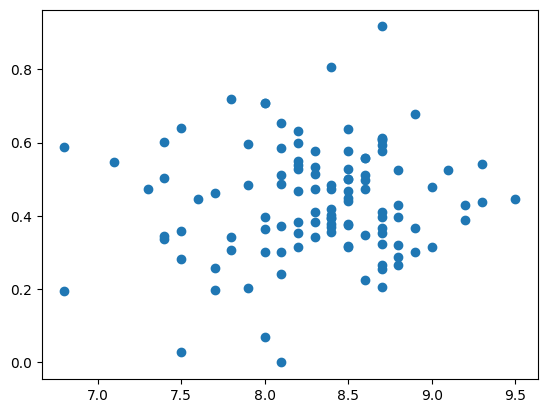

In [36]:
plt.scatter(valid_data.loc[valid_data["nodes"]>50,"imdb-score"],
            valid_data.loc[valid_data["nodes"]>50,"modularity"])

In [ ]:
plt.hist(meta.loc[meta["nodes"]<1000,"nodes"])

## Other idea

In [42]:
valid_data.loc[valid_data["id"] == "black-mirror",:]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat
63,black-mirror,217.0,513.0,11,Black Mirror,8.7,631229,Black Mirror Wiki,tv,400,600,10,0.917006,above 9


#### Histograms

In [118]:
import seaborn as sns

In [119]:
valid_data.head()

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat,commnum
0,walkingdead,5942.0,72746.0,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,0.652640,Bottom third,23
1,simpsons,5410.0,30943.0,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,0.612733,Top third,117
2,arrow,3681.0,28806.0,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,0.638665,Bottom third,26
3,greysanatomy,3457.0,13554.0,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,0.577096,Middle third,70
4,24,3180.0,73590.0,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,0.419688,Bottom third,11


In [132]:
score_cats = ["Bottom third","Middle third","Top third"]


In [133]:
score_cats

['Bottom third', 'Middle third', 'Top third']

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\4124724438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_data["modularity"])


<Axes: xlabel='modularity', ylabel='Density'>

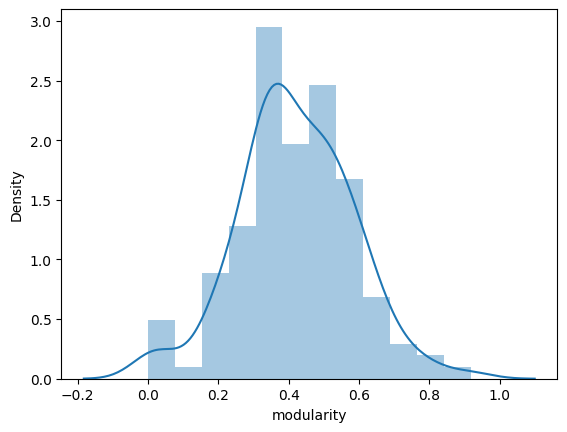

In [134]:
sns.distplot(valid_data["modularity"])

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3074462423.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['modularity'], hist = False, kde = True,
c:\Users\tomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3074462423.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Plea

Text(0, 0.5, 'Density')

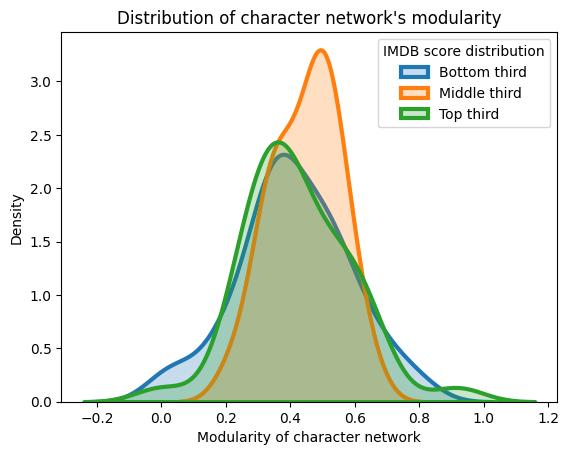

In [136]:

for cat in score_cats:
    # Subset to the airline
    subset = valid_data[valid_data['score_cat'] == cat]
    
    # Draw the density plot
    sns.distplot(subset['modularity'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = cat)
plt.legend(prop={'size': 10}, title = 'IMDB score distribution')
plt.title("Distribution of character network's modularity")
plt.xlabel('Modularity of character network')
plt.ylabel('Density')